# DTEK0042 Exercise 3
    Group Members:
    1. Tristan Deenen
    2. Anna Fernandez-Rajal i Sabala 
    3. Irene Torrijos Robles

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [7]:
import scipy
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

[154836. 154820. 154852. ... 157941. 157922. 157884.]


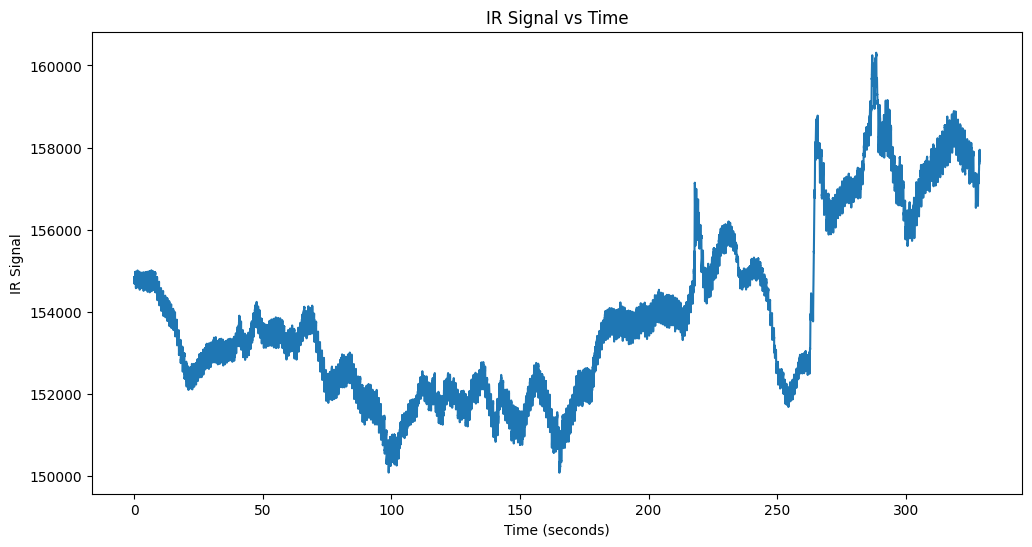

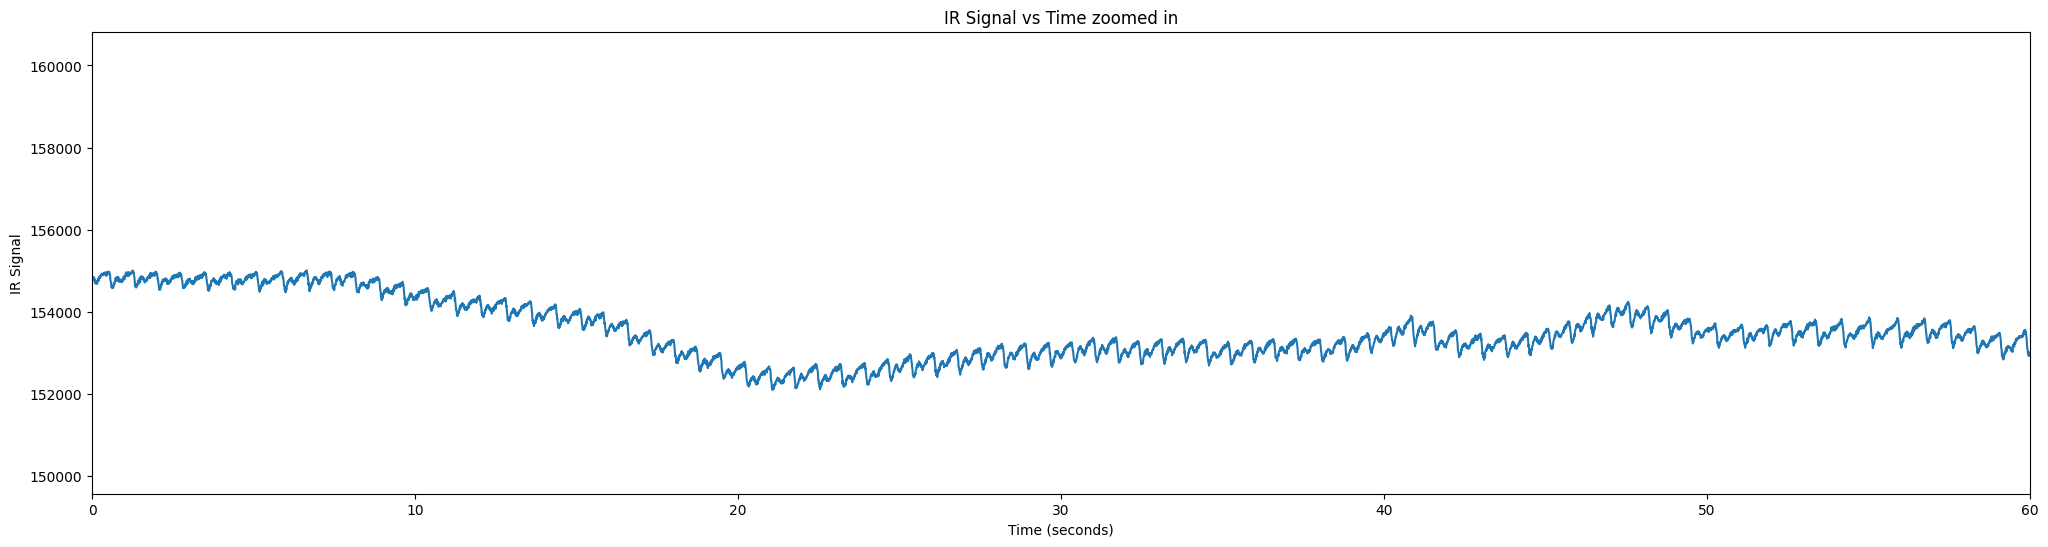

In [8]:
# Load the data using pandas
PPG_data = pd.read_csv('PPG_record.txt', names=['timestamp', 'red', 'infrared', 'green'])

# Convert pandas series data to numpy type for further analysis
PPG_data = PPG_data.to_numpy()

# Extract IR signal
PPG_sig = PPG_data[:, 2]

print(PPG_sig)

# Calculate the time array
time_seconds = np.linspace(0, len(PPG_sig) / 132, len(PPG_sig))

# Plot the IR signal vs time in seconds
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visualization
plt.plot(time_seconds, PPG_sig)
plt.title('IR Signal vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('IR Signal')
plt.savefig('IR_Signal.png')
plt.show()

# Plot the IR signal vs time in seconds
plt.figure(figsize=(25, 6))  # Adjust the figure size for better visualization
plt.plot(time_seconds, PPG_sig)
plt.title('IR Signal vs Time zoomed in')
plt.xlabel('Time (seconds)')
plt.ylabel('IR Signal')

# Set the first x-axis range, adjust for different sections of the plot
#plt.xlim(0,10)
plt.xlim(0, 60)
#plt.xlim(60, 120) 
#plt.xlim(120, 180) 
#plt.xlim(180, 240)
#plt.xlim(240, 300)
#plt.xlim(300, 330)
plt.savefig('IR_Signal_Zoomed_In.png')
plt.show()


# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

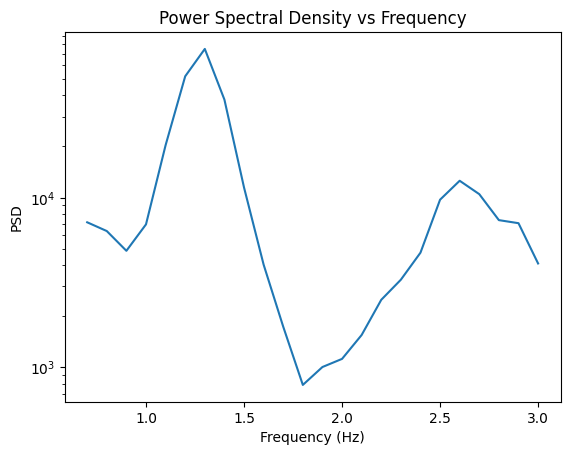

Dominant Frequency: 1.3


In [9]:
# Compute power spectral density (PSD) using the Welch method
Fs = 132  # Sampling frequency
nperseg = 10 * Fs  # Number of data points used in each block for the FFT
frequencies, PSD = welch(PPG_sig, fs=Fs, nperseg=nperseg)

# Select frequencies between 0.7 and 3Hz
mask = (frequencies >= 0.7) & (frequencies <= 3)
frequencies = frequencies[mask]
PSD = PSD[mask]

# Plot the limited PSD versus frequency
plt.figure()
plt.semilogy(frequencies, PSD)
plt.title('Power Spectral Density vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.savefig('PSD.png')
plt.show()

# Find the dominant PSD value and its corresponding frequency
max_PSD_idx = np.argmax(PSD)
dominant_PSD = PSD[max_PSD_idx]
dominant_freq = frequencies[max_PSD_idx]

print("Dominant Frequency:", dominant_freq)

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

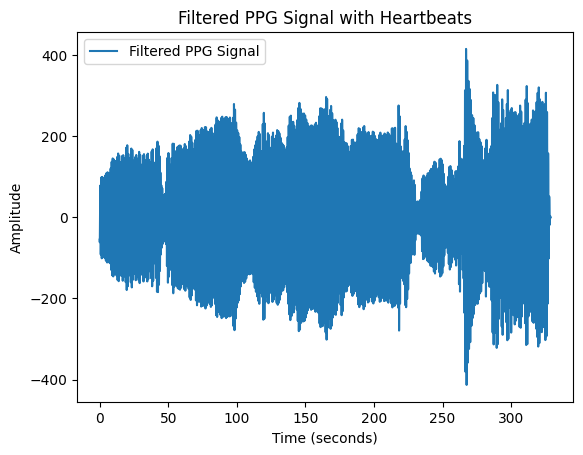

In [10]:
from scipy.signal import butter, filtfilt, freqz

# Design a bandpass filter
nyquist = 0.5 * Fs
low = (dominant_freq - 0.3) / nyquist
high = (dominant_freq + 0.3) / nyquist
b, a = butter(4, [low, high], btype='band')

# Filter the original PPG signal with the designed filter
filtered_PPG_sig = filtfilt(b, a, PPG_sig)

# Plot the filtered PPG signal showing heartbeats in the form of a sinusoid
plt.figure()
plt.plot(time_seconds, filtered_PPG_sig, label='Filtered PPG Signal')
plt.title('Filtered PPG Signal with Heartbeats')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# Set the first x-axis range, adjust for different sections of the plot
#plt.xlim(0,10)
#plt.xlim(0, 60)
#plt.xlim(60, 120) 
#plt.xlim(120, 180) 
#plt.xlim(180, 240)
#plt.xlim(240, 300)
#plt.xlim(300, 330)
plt.savefig('Filtered_PPG_Signal.png')
plt.show()


## Observations:
    Because of the Butterworth filter, low frequencies caused by the respiratory have been filtered out. Furthermore, the quite strong harmonic of around 2.6 Hz is filtered out as well. Overall, this creates a much smoother and less fluctuating plot. There seems to be an anomaly at around 270 seconds though.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

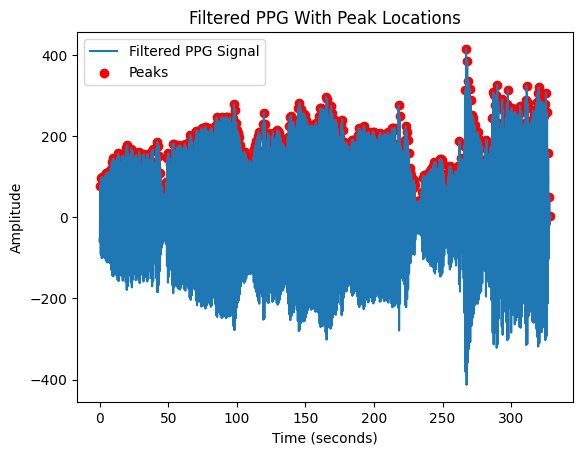

Heart Rate: 78.45 beats per minute


In [11]:
from scipy.signal import argrelextrema

# Find the peaks of the filtered signal in the time domain
peaks_indices = argrelextrema(filtered_PPG_sig, np.greater)[0]
RR_intervals = np.diff(peaks_indices) / Fs  # Convert peak indices to intervals in seconds

# Calculate the average value of the peak-to-peak intervals
avg_peak_interval = np.mean(RR_intervals)

# Convert the computed average value to heart rate
HeartRate = 60.0 / avg_peak_interval

# Plot Filtered PPG With peak locations
plt.figure()
plt.plot(time_seconds, filtered_PPG_sig, label='Filtered PPG Signal')
plt.scatter(time_seconds[peaks_indices], filtered_PPG_sig[peaks_indices], color='r', label='Peaks')
plt.title('Filtered PPG With Peak Locations')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
# Set the first x-axis range, adjust for different sections of the plot
#plt.xlim(0,10)
#plt.xlim(0, 60)
#plt.xlim(60, 120) 
#plt.xlim(120, 180) 
#plt.xlim(180, 240)
#plt.xlim(240, 300)
#plt.xlim(300, 330)
plt.savefig('Filtered_PPG_With_Peak_Locations.png')
plt.show()


print("Heart Rate: {:.2f} beats per minute".format(HeartRate))


## Observations: 
    The envelope overall of the filtered PPG seems to be pretty consistent, indicating the tested person is likely to be physically inactive. On a smaller scale though, the waveform looks a bit erractic, so the person is likely to be a bit stressed. Furthermore, a bpm of 78.45 is not very low. Therefore, the person probably has been in a slightly stressful situation. 
    We can clearly see a drop in heart rate at around the 230-260 seconds range, followed by a massive spike at around 270 seconds.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [12]:
# Convert RR intervals to milliseconds
RR_intervals_ms = RR_intervals * 1000

# Calculate AVNN (Average of RR intervals)
AVNN = np.mean(RR_intervals_ms)

# Calculate SDNN (Standard Deviation of RR intervals)
SDNN = np.std(RR_intervals_ms)

# Calculate RMSSD (Root Mean Square of Successive RR interval differences)
RR_diff = np.diff(RR_intervals_ms)
RMSSD = np.sqrt(np.mean(RR_diff ** 2))

# Report the AVNN, SDNN, and RMSSD values
print("AVNN (ms): {:.2f}".format(AVNN))
print("SDNN (ms): {:.2f}".format(SDNN))
print("RMSSD (ms): {:.2f}".format(RMSSD))


AVNN (ms): 764.83
SDNN (ms): 64.59
RMSSD (ms): 34.36


## Observations:
    The AVNN is at the dominant frequency of 1.3Hz, confirming that there were overall no massive changes in heart rate. However, the SDNN is quite low, which would actually indicate the person is undergoing a stressful situation. The RMSSD is a bit low, but nothing out of the ordinary. This likely indicates that this person probably has a healthy heart with no major medical issues.